In [8]:
import os                     
import numpy as np            
import pandas as pd            
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder               
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
path ="Iris.csv" 
assert os.path.exists(path), "the file is not in the right path"
 
df=pd.read_csv(path)
#Informaçoes do dataset (medias, desvio padrão, valores nulos, correlações)
print(df.head())
print(df.describe())
print(df.info())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%   

Correlation matrix
                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


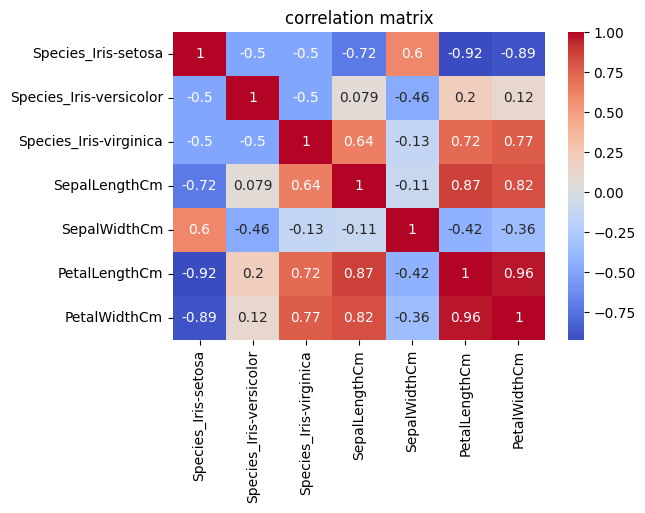

In [10]:
#clean data for preperation (transformerss)
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

correlation_matrix = df.select_dtypes(include=['number']).corr()
print("Correlation matrix")
print(correlation_matrix)

# Pre processing for variables categorics and numerics
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Species']),
        ('num', 'passthrough', ['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm'])
    ]
)
df_transformed = preprocess.fit_transform(df)
feature_names = (preprocess.named_transformers_['cat'].get_feature_names_out(['Species'])).tolist() + \
                ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

df_final = pd.DataFrame(df_transformed, columns=feature_names)
correlation_matrix = df_final.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("correlation matrix")
plt.show()

Train: 0.9916666666666667
Test: 1.0

variable importance:
SepalLengthCm: 0.017
SepalWidthCm: 0.000
PetalLengthCm: 0.905
PetalWidthCm: 0.078

Importância ordenada:
         feature  importance
2  PetalLengthCm    0.904552
3   PetalWidthCm    0.078495
0  SepalLengthCm    0.016953
1   SepalWidthCm    0.000000


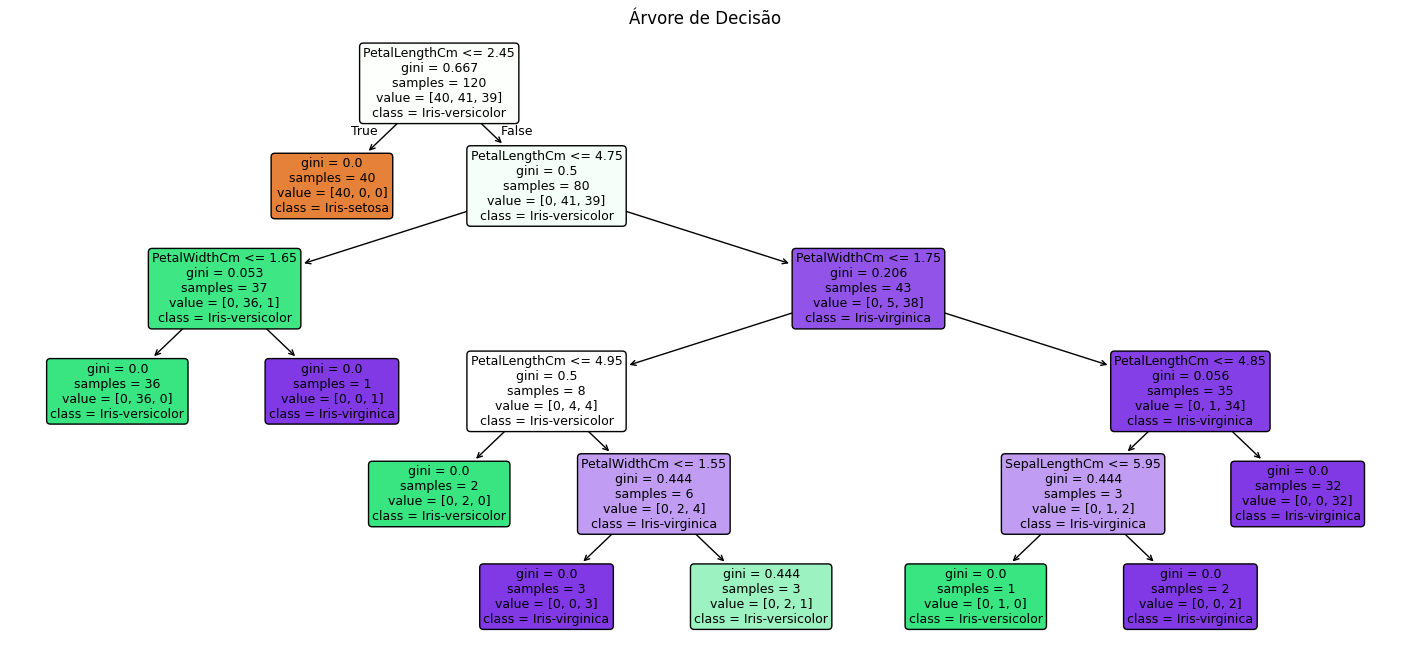

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']]
y = df['Species']

preprocess = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm'])
    ]
)

tree_model = Pipeline([
    ("prep", preprocess),
    ("tree", DecisionTreeClassifier(
        max_depth=5,
        random_state=42
    ))
])

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)
tree_model.fit(X_train, y_train)
train_score = tree_model.score(X_train, y_train)
test_score = tree_model.score(X_test, y_test)

print("Train:", train_score)
print("Test:", test_score)

feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
importances = tree_model.named_steps['tree'].feature_importances_

print("\nvariable importance:")
for name, imp in zip(feature_names, importances):
    print(f"{name}: {imp:.3f}")

feat_imp = pd.DataFrame({
    "feature": feature_names, 
    "importance": importances
}).sort_values(by='importance', ascending=False)

print("\nImportância ordenada:")
print(feat_imp)

plt.figure(figsize=(18, 8))
plot_tree(
    tree_model.named_steps['tree'],
    feature_names=feature_names,
    class_names=y.unique(),
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title("Árvore de Decisão ")
plt.show()


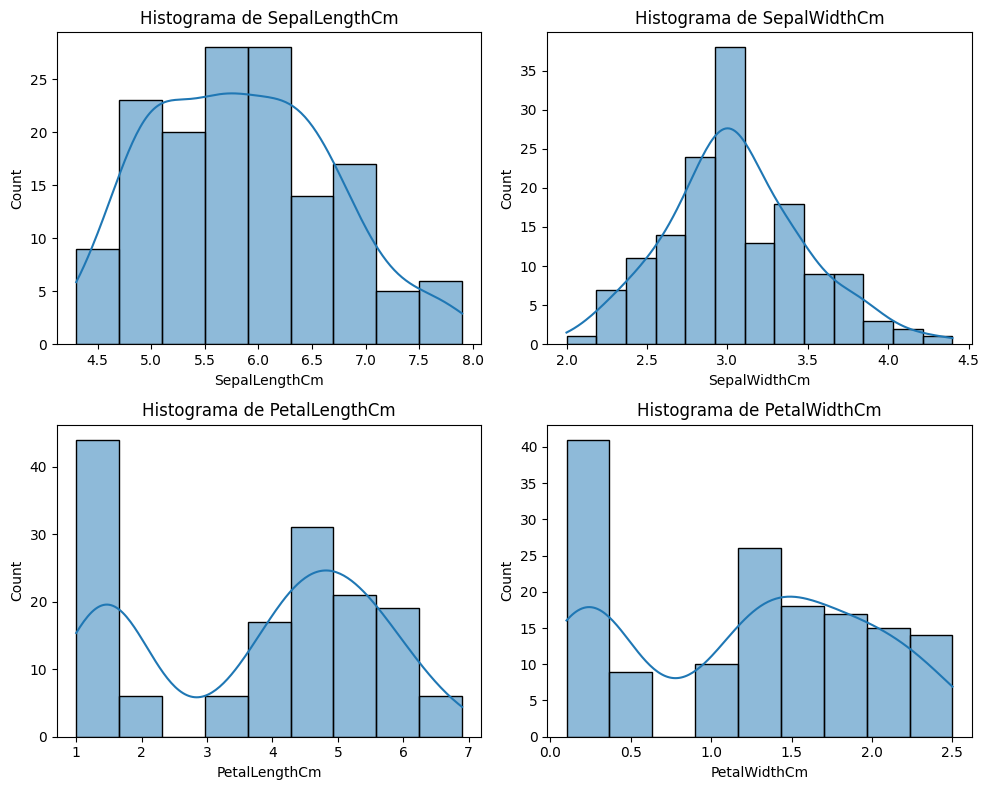

In [12]:
num_cols = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
plt.figure(figsize=(10, 8))

#numerates the numeric columns/variables for display
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Histograma de {col}")

plt.tight_layout()
plt.show()


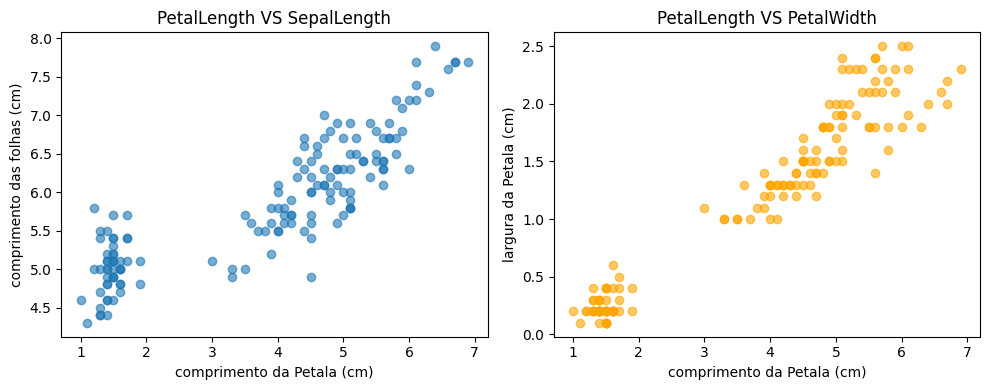

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

x=df[['PetalLengthCm']].values 
y=df['PetalWidthCm'].values 
x1=df[['PetalLengthCm']].values 
y1=df['SepalLengthCm'].values

# Primeiro scatter
axes[0].scatter(x1, y1, alpha=0.6)
axes[0].set_xlabel('comprimento da Petala (cm)')
axes[0].set_ylabel('comprimento das folhas (cm)')
axes[0].set_title('PetalLength VS SepalLength')

# Segundo scatter
axes[1].scatter(x, y, alpha=0.6, color="orange")
axes[1].set_xlabel('comprimento da Petala (cm)')
axes[1].set_ylabel('largura da Petala (cm)')
axes[1].set_title('PetalLength VS PetalWidth')

plt.tight_layout()
plt.show()


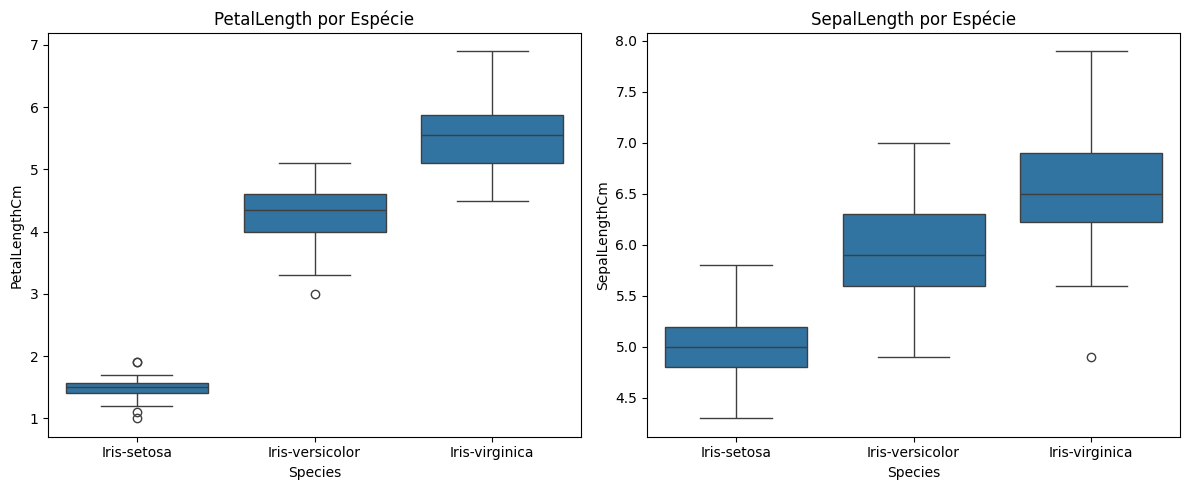

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="Species", y="PetalLengthCm")
plt.title("PetalLength por Espécie")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Species", y="SepalLengthCm")
plt.title("SepalLength por Espécie")

plt.tight_layout()
plt.show()


best hiperparameters LR: {'lr__C': 10, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
best accuracy CV: 1.0

Logistic Regression
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



C:\Users\diogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\diogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\diogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\diogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_sag.py:348: Conve

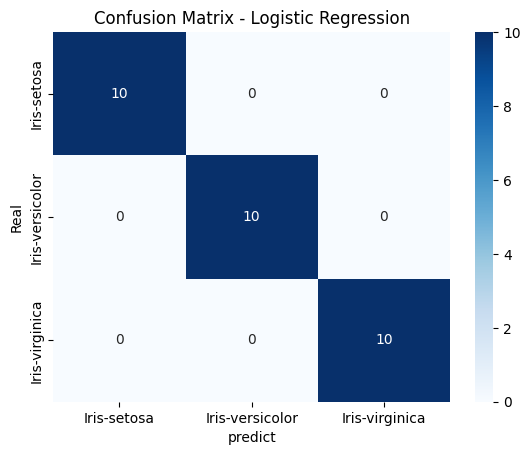

In [15]:
#variables
X = df.drop('Species', axis=1)
y = df['Species']

# Treino / teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y) #good stratify

# Logistic Regression
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=200))
])

#Hipertuning
param_grid_lr = {
    'lr__C': [0.01, 0.1, 1, 10, 100],
    'lr__solver': ['lbfgs', 'newton-cg', 'sag'],
    'lr__penalty': ['l2']
}

from sklearn.model_selection import GridSearchCV
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

print("")
print("best hiperparameters LR:", grid_lr.best_params_)
print("best accuracy CV:", grid_lr.best_score_)
print("")

#pipe_lr.fit(X_train, y_train)
y_pred_lr = grid_lr.predict(X_test)

print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))

# Matriz de confusão
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=grid_lr.best_estimator_.named_steps['lr'].classes_,
            yticklabels=grid_lr.best_estimator_.named_steps['lr'].classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("predict")
plt.ylabel("Real")
plt.show()


best hyperparameters RF: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
best accuracy CV: 1.0
Random Forest
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



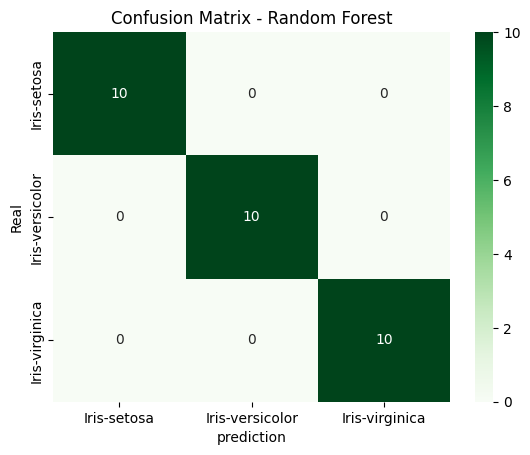

In [16]:
#Random Forest
rf = RandomForestClassifier(random_state=42)

# hiperparameters for tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearch with 5-fold CV
grid_rf = GridSearchCV(rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# test/results
print("best hyperparameters RF:", grid_rf.best_params_)
print("best accuracy CV:", grid_rf.best_score_)

#rf.fit(X_train, y_train)
y_pred_rf = grid_rf.predict(X_test)

# test/results
print("Random Forest")
print(classification_report(y_test, y_pred_rf))

# confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=grid_rf.best_estimator_.classes_,
            yticklabels=grid_rf.best_estimator_.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("prediction")
plt.ylabel("Real")
plt.show()



best hyperparameters NB: {'var_smoothing': np.float64(0.008111308307896872)}
best accuracy CV: 1.0
Naive Bayes
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



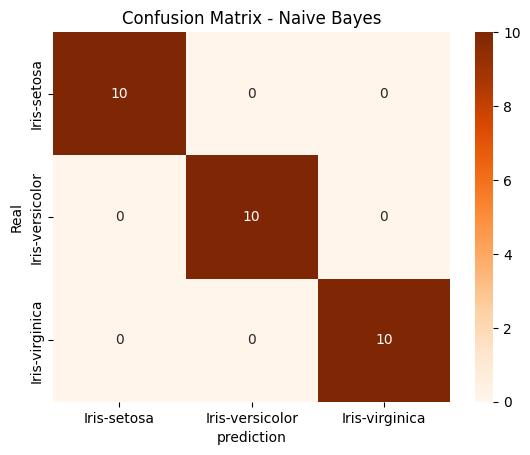

In [17]:
#Naive Bayes
nb = GaussianNB()

# hyperparameters for tuning (less than previous, with logspace)
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)  # reduce to 10 for faster results
}

# GridSearch 5-fold CV
grid_nb = GridSearchCV(nb, param_grid=param_grid_nb, cv=5, scoring='accuracy')
grid_nb.fit(X_train, y_train)

# results/test
print("best hyperparameters NB:", grid_nb.best_params_)
print("best accuracy CV:", grid_nb.best_score_)

#nb.fit(X_train, y_train)
y_pred_nb = grid_nb.predict(X_test)

# results/test
print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))

# confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=grid_nb.classes_,
            yticklabels=grid_nb.classes_)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("prediction")
plt.ylabel("Real")
plt.show()



In [18]:
import joblib 

# Defines x y right (only the 4 features)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species'] 

# pipeline of the best hyperparameters
final_model = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(C=10, penalty='l2', solver='lbfgs', max_iter=200))
])

# Trains the complete dataset (150 amostras)
final_model.fit(X, y)

# saves the new model (replaces the old one)
joblib.dump(final_model, 'iris_model.joblib')
print("Columns used in training:", X.columns.tolist())

Columns used in training: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
